## Import Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session (link) from Python to the DB
session = Session(engine)

#### View Data Types 

In [9]:
# Get a list of column names and types for measurement table
inspector = inspect(engine)
columns_measurement = inspector.get_columns('measurement')
for i in columns_measurement:
    print (i["name"], i["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# display first five rows of data for measurement table
engine.execute("SELECT * FROM measurement LIMIT 5").all()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# Get a list of column names and types for station table
inspector = inspect(engine)
columns_measurement = inspector.get_columns('station')
for i in columns_measurement:
    print (i["name"], i["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# display first five rows of data for station table
engine.execute("SELECT * FROM station LIMIT 5").all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

'2017-08-23'

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days =365)

# Perform a query to retrieve the data and precipitation scores
last_annual_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= query_date).filter(Measurement.date <= recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_annual_prcp_df = pd.DataFrame(last_annual_prcp, columns=["date", "precipation"])

#drop missing values
last_annual_prcp_df = last_annual_prcp_df.dropna()

# Sort the dataframe by date
last_annual_prcp_df = last_annual_prcp_df.sort_values(by="date", ascending=True).set_index("date")

# display head
last_annual_prcp_df.head()



,precipation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


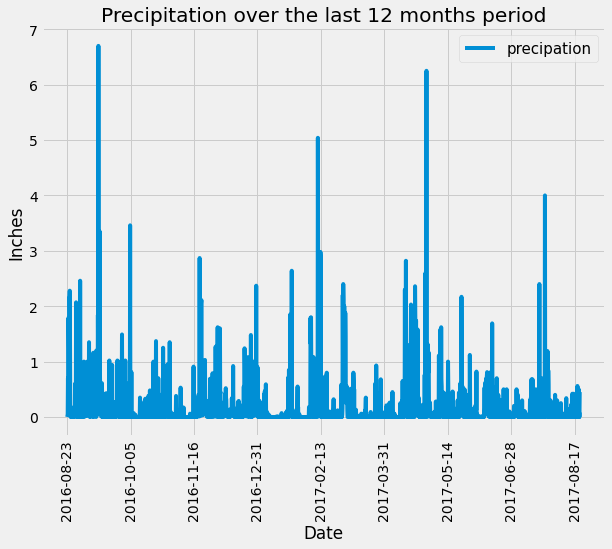

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
last_annual_prcp_df.plot(figsize=(9,7))
plt.xticks(rotation=90)
plt.legend(loc='upper right', fontsize= 15)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.title("Precipitation over the last 12 months period")
plt.show()

In [16]:
# summary statistics for the precipitation data
last_annual_prcp_df.describe()


,precipation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query()

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [21]:
# Close Session
session.close()